In [1]:
from scipy.io import wavfile
from os.path import dirname, join
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft

In [2]:
# location of the data
data_dir = "/Users/jack/programming/machine_learning/CSS586/term_project/musicnet/train_data"
wav_fname = join(data_dir, "2473.wav")

In [3]:
# load the .wav file contents
fs, data = wavfile.read(wav_fname)
print("Shape of the data =", data.shape)
print("The sampling rate =", fs)
print("length of the recording =", data.shape[0] / fs, "seconds")

Shape of the data = (14785920,)
The sampling rate = 44100
length of the recording = 335.28163265306125 seconds


Text(0, 0.5, 'amplitude')

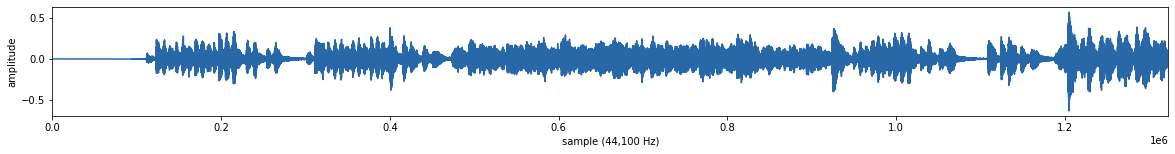

In [4]:
# visualize the data
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(2)
plt.plot(data[0:30 * fs], color=(41/255., 104/255., 168/255.))
fig.axes[0].set_xlim([0, 30*fs])
fig.axes[0].set_xlabel('sample (44,100 Hz)')
fig.axes[0].set_ylabel('amplitude')

In [5]:
window_size = 2048      # 2048-sample fourier windows
stride = 512            # 512 samples betweeen windows
wps = fs / float(512)   # ~86 windows/sec
Xs = np.empty([int(10 * wps), 2048])

# perform FFT
for i in range(Xs.shape[0]):
    Xs[i] = np.abs(fft(data[i*stride: i*stride + window_size]))

(0.0, 150.0)

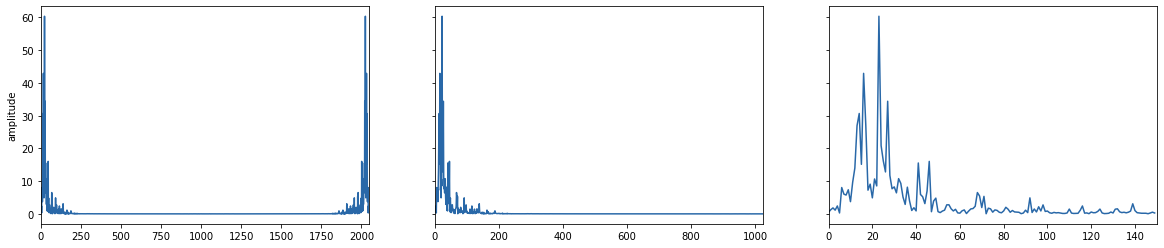

In [6]:
second = 3

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3,sharey=True)
fig.set_figwidth(20)
ax1.plot(Xs[int(second*wps)],color=(41/255.,104/255.,168/255.))
ax1.set_xlim([0,window_size])
ax1.set_ylabel('amplitude')
ax2.plot(Xs[int(second*wps),0:int(window_size/2)],color=(41/255.,104/255.,168/255.))
ax2.set_xlim([0,window_size/2])
ax3.plot(Xs[int(second*wps),0:150],color=(41/255.,104/255.,168/255.))
ax3.set_xlim([0,150])

Text(0, 0.5, 'amplitude')

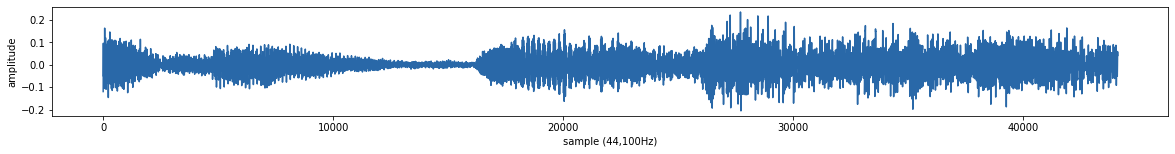

In [18]:
fig = plt.figure(figsize=(10,5))
fig.set_figwidth(20)
fig.set_figheight(2)
plt.plot(data[5*fs:6*fs],color=(41/255.,104/255.,168/255.))
fig.axes[0].set_xlabel('sample (44,100Hz)')
fig.axes[0].set_ylabel('amplitude')

Text(0, 0.5, 'frequency')

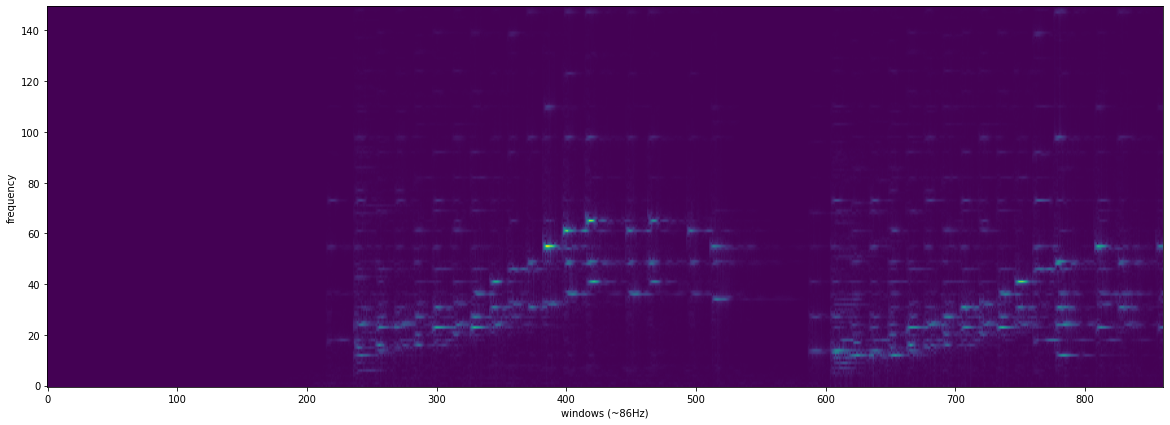

In [8]:
# Heat map of the spectrogram
fig = plt.figure(figsize=(20,7))
plt.imshow(Xs.T[0:150],aspect='auto')
plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')

In [9]:
# play with the librosa toolkit
import librosa
import librosa.display

(7392960,)
(128, 862)


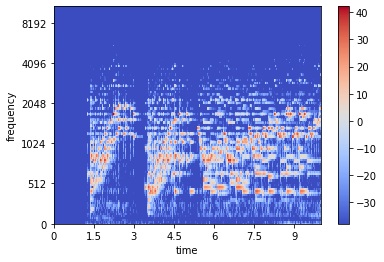

In [12]:
# load the audio
data, _ = librosa.load(wav_fname)
print(data.shape)
# create Mel spectrogram of sounds
melSpec = librosa.feature.melspectrogram(y=data[:441000], sr=44100, n_fft=2048)
print(melSpec.shape)

# convert amplitude to dB
db = librosa.amplitude_to_db(melSpec)

# plot the mel spectrogram
fig = plt.figure()
librosa.display.specshow(db, sr=44100, x_axis='time', y_axis='mel')
fig.axes[0].set_xlabel('time')
fig.axes[0].set_ylabel('frequency')
plt.colorbar()